# **Submission by:**


1.   Akshat Chaudhary (2021MT60814)
2.   Aniket Pandey (2021MT60266)
3. Aditya Arya (2021MT60958)



In [4]:
!pip install tensorflow tensorflow_decision_forests

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tensorflow_decision_forests-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.5 MB)
  Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import io
pandas_data=pd.read_excel("/content/Data-RF.xlsx")
pandas_data

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,High,C-
4,7.25,24,30.0,Male,High,C-
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,B-
496,11.00,24,31.0,Female,Moderate,C
497,11.75,24,47.0,Male,High,B-
498,0.00,20,0.0,Female,Low,E


In [3]:
df_cat=pandas_data.select_dtypes(object)
df_num=pandas_data.select_dtypes(np.number)
df_cat
df_cat_encoded = df_cat.apply(lambda x: x.astype('category').cat.codes) #converting categorical data to numerical values
print(df_cat_encoded)

     Gender  Attendance  Grade
0         2           0      0
1         0           0      0
2         2           0      3
3         2           0      5
4         2           0      5
..      ...         ...    ...
495       2           1      3
496       0           2      4
497       2           0      3
498       0           1      7
499       2           2      2

[500 rows x 3 columns]


In [4]:
train_ds=tfdf.keras.pd_dataframe_to_tf_dataset(pandas_data, label='Grade') #default dataset without manually encoding categorical data

In [5]:
pandas_data_encoded = pd.concat([df_num,df_cat_encoded],axis=1)
train_ds_encoded=tfdf.keras.pd_dataframe_to_tf_dataset(pandas_data_encoded, label='Grade') #dataset after encoding categorical data

In [6]:
model=tfdf.keras.RandomForestModel()

Use /tmp/tmpt380brjl as temporary training directory


In [7]:
model.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:06.407773. Found 500 examples.
Training model...
Model trained in 0:00:00.334586
Compiling model...
Model compiled.


In [8]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Attendance
	Gender
	Lab-Test1(30)
	Lab-Test2(24)
	Midsem_Test_(90)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Midsem_Test_(90)"  0.792896 ################
    2.    "Lab-Test1(30)"  0.362565 #####
    3.    "Lab-Test2(24)"  0.157398 
    4.       "Attendance"  0.149319 
    5.           "Gender"  0.148928 

Variable Importance: NUM_AS_ROOT:
    1. "Midsem_Test_(90)" 239.000000 ################
    2.    "Lab-Test1(30)" 61.000000 

Variable Importance: NUM_NODES:
    1. "Midsem_Test_(90)" 5552.000000 ################
    2.    "Lab-Test1(30)" 5301.000000 ###############


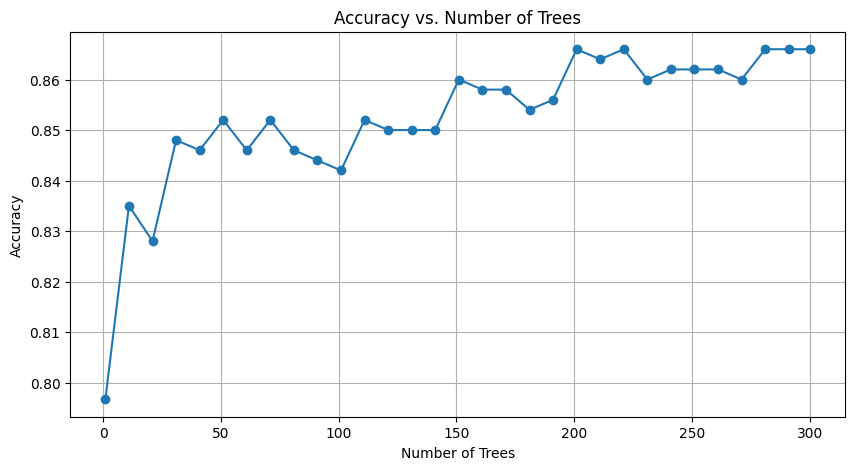

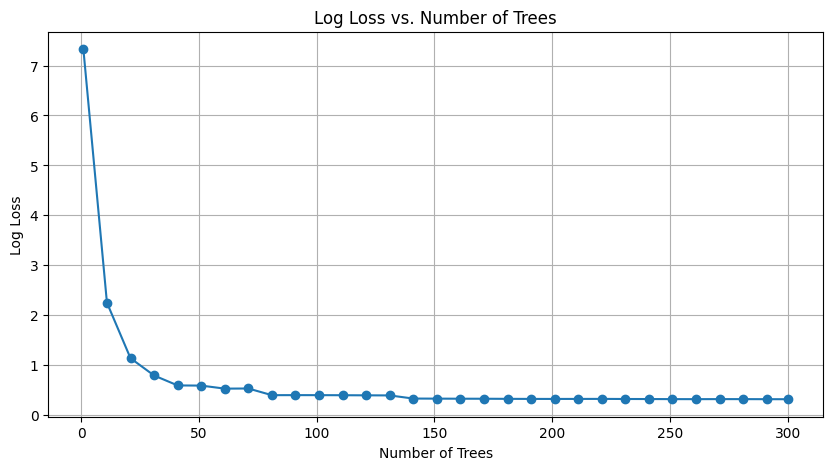

In [9]:
trees = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 300]
accuracies = [0.796703, 0.83501, 0.828, 0.848, 0.846, 0.852, 0.846, 0.852, 0.846, 0.844, 0.842, 0.852, 0.85, 0.85, 0.85, 0.86, 0.858, 0.858, 0.854, 0.856, 0.866, 0.864, 0.866, 0.86, 0.862, 0.862, 0.862, 0.86, 0.866, 0.866, 0.866]
log_losses = [7.32756, 2.24947, 1.13795, 0.791936, 0.59285, 0.589535, 0.528708, 0.53131, 0.397721, 0.398505, 0.39801, 0.396691, 0.394478, 0.392634, 0.32981, 0.328289, 0.326623, 0.326103, 0.323932, 0.322711, 0.322175, 0.322459, 0.32308, 0.32114, 0.320131, 0.318527, 0.317875, 0.318748, 0.318504, 0.31722, 0.316497]

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(trees, accuracies, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Trees")
plt.grid(True)
plt.show()

# Plotting log loss
plt.figure(figsize=(10, 5))
plt.plot(trees, log_losses, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Log Loss")
plt.title("Log Loss vs. Number of Trees")
plt.grid(True)
plt.show()

# **Visualising the Random Forest**

In [12]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0,max_depth=3)

# **Model with the manual encoding**

In [ ]:
model2 = tfdf.keras.RandomForestModel()

Use /tmp/tmp1g467ncz as temporary training directory


In [ ]:
model2.fit(train_ds_encoded)

Reading training dataset...
Training dataset read in 0:00:00.259640. Found 500 examples.
Training model...
Model trained in 0:00:00.363677
Compiling model...
Model compiled.


In [ ]:
model2.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Attendance
	Gender
	Lab-Test1(30)
	Lab-Test2(24)
	Midsem_Test_(90)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Midsem_Test_(90)"  0.791233 ################
    2.    "Lab-Test1(30)"  0.361506 #####
    3.    "Lab-Test2(24)"  0.157606 
    4.       "Attendance"  0.148902 
    5.           "Gender"  0.148861 

Variable Importance: NUM_AS_ROOT:
    1. "Midsem_Test_(90)" 239.000000 ################
    2.    "Lab-Test1(30)" 61.000000 

Variable Importance: NUM_NODES:
    1. "Midsem_Test_(90)" 5566.000000 ################
    2.    "Lab-Test1(30)" 5339.000000 ##############

As we can see, both the models perform very similar as is expected having almost the same accuracy


# **Splitting training and test data (70:30)**

In [ ]:
X = pandas_data.drop(columns=['Grade'])  # Assuming 'Grade' is the target column
y = pandas_data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_pandas = pd.concat([X_train,y_train],axis=1)
test_pandas = pd.concat([X_test,y_test],axis=1)
print(train_pandas)
print(test_pandas)

     Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)   Gender Attendance Grade
5             8.00             24              12.0     Male       High     D
116          16.00             24              51.0     Male       High     B
45            4.25              0              26.0   Female       High     D
16            0.00             24              40.0  Female        High     C
462           3.75             24              23.0   Female       High    C-
..             ...            ...               ...      ...        ...   ...
106           2.25             24              42.0     Male       High     C
270          16.00             24              38.0   Female   Moderate    B-
348           7.25             24              39.0   Female        Low     C
435           5.50             24              37.0   Female       High     C
102           3.25             22              28.0     Male       High    C-

[350 rows x 6 columns]
     Lab-Test1(30)  Lab-Test2(24)  Midse

In [ ]:
train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_pandas,label="Grade")
test_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_pandas,label="Grade")

In [ ]:
model = tfdf.keras.RandomForestModel()

model.fit(train_tf)
#model.summary()
# Evaluate the model on test_data
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_tf,return_dict = True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

Use /tmp/tmp3id5bdav as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.197477. Found 350 examples.
Training model...
Model trained in 0:00:00.249043
Compiling model...
Model compiled.
1/1 [==============================] - 0s 481ms/step - loss: 0.0000e+00 - accuracy: 0.8667

loss: 0.0000
accuracy: 0.8667


In [ ]:
model.make_inspector().evaluation()

Evaluation(num_examples=350, accuracy=0.8228571428571428, loss=0.38444694380009814, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

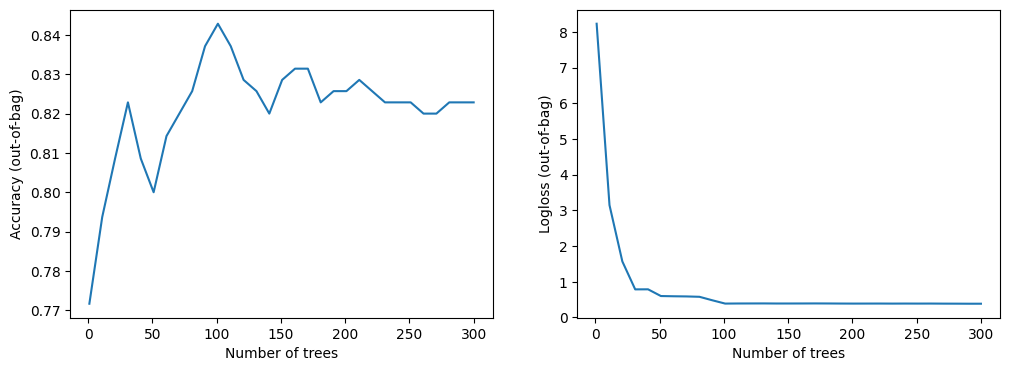

In [ ]:
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# **Gradient Boosted Decision Trees**

In [ ]:
model_GBT = tfdf.keras.GradientBoostedTreesModel()
model_GBT.fit(train_tf)
model_GBT.compile(metrics=["accuracy"])
evaluation = model_GBT.evaluate(test_tf,return_dict = True)
print()

Use /tmp/tmprqqlij54 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.562699. Found 350 examples.
Training model...
Model trained in 0:00:00.709104
Compiling model...
Model compiled.
1/1 [==============================] - 0s 190ms/step - loss: 0.0000e+00 - accuracy: 0.8533



In [ ]:
model_RF=tfdf.keras.RandomForestModel(num_trees=30)
model_RF.fit(train_tf)
model_RF.compile(metrics=["accuracy"])
evaluation = model_RF.evaluate(test_tf,return_dict = True)
print()

Use /tmp/tmpg43_aep3 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.234159. Found 350 examples.
Training model...
Model trained in 0:00:00.057799
Compiling model...


Model compiled.


1/1 [==============================] - 0s 192ms/step - loss: 0.0000e+00 - accuracy: 0.8600



**Both the Random Forest (with 30 DTs) and Gradient Boosted Decision Trees, perform almost identically with ~85% accuracy on the test set**

# **Comparing Random Forest on training and testing accuracy**

In [ ]:
model_RF=tfdf.keras.RandomForestModel()
model_RF.fit(train_tf)
model_RF.compile(metrics=["accuracy"])
evaluation = model_RF.evaluate(test_tf,return_dict = True)
print()
evaluation2 = model_RF.evaluate(train_tf,return_dict = True)


Use /tmp/tmp3tol82v4 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.409677. Found 350 examples.
Training model...
Model trained in 0:00:00.506867
Compiling model...


Model compiled.


1/1 [==============================] - 0s 251ms/step - loss: 0.0000e+00 - accuracy: 0.8667



1/1 [==============================] - 0s 192ms/step - loss: 0.0000e+00 - accuracy: 0.9400


**As expected, it performs better on the training set on which it was trained with 94% accuracy and ~87% accuracy on the test set**

# **Tuning hyperparameters for RF**

Use /tmp/tmptu0so3op as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.192270. Found 350 examples.
Training model...
Model trained in 0:00:00.022163
Compiling model...
Model compiled.


1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - accuracy: 0.3333
Use /tmp/tmpm2nchmj9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.193964. Found 350 examples.
Training model...
Model trained in 0:00:00.021710
Compiling model...
Model compiled.
1/1 [==============================] - 0s 205ms/step - loss: 0.0000e+00 - accuracy: 0.3200
Use /tmp/tmp6e6jdaxg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.299278. Found 350 examples.
Training model...
Model trained in 0:00:00.041513
Compiling model...
Model compiled.
1/1 [==============================] - 0s 273ms/step - loss: 0.0000e+00 - accuracy: 0.5467
Use /tmp/tmpjftwxhvk as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.471880. Found 350 examples.
Training model...
Model trained in 0:00:00.045679
Compiling model...
Model compiled.
1/1 [==============================] - 0s 314m

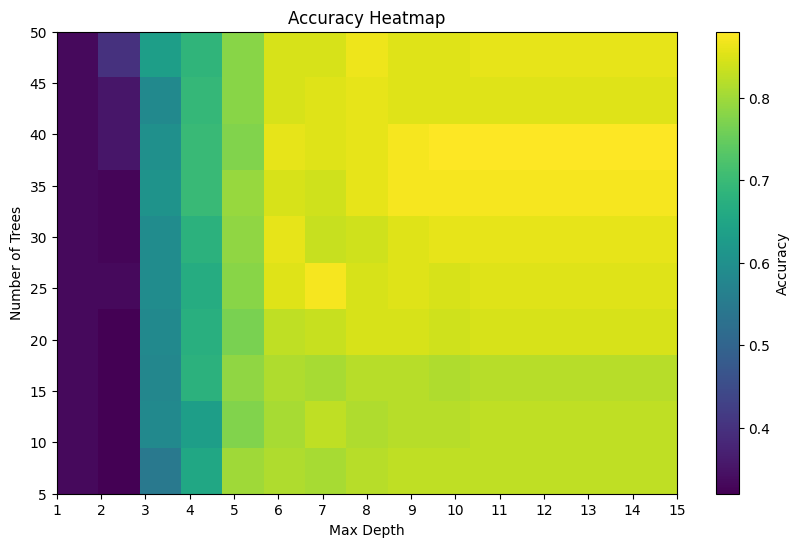

In [ ]:
num_trees = range(5,51,5)  # More than 50 trees is prone to overfitting, given 500 data samples, so we chose in between 5 and 50 trees, at intervals of 5
max_depth = range(1, 16)  # Taking max depth from 1 to 15


accuracies_matrix = np.zeros((len(num_trees), len(max_depth)))
maxx = 0

# Loop through each combination of number of trees and max depth
for i, n_trees in enumerate(num_trees):
    for j, depth in enumerate(max_depth):
        # Create and train the Random Forest model
        model_RF = tfdf.keras.RandomForestModel(num_trees=n_trees, max_depth=depth)
        model_RF.fit(train_tf)

        # Evaluate the model on test data
        model_RF.compile(metrics=["accuracy"])
        evaluation = model_RF.evaluate(test_tf, return_dict=True)

        # Store the accuracy in the accuracies matrix
        accuracies_matrix[i, j] = evaluation["accuracy"]
        if(accuracies_matrix[i,j]>maxx):
          t = n_trees
          d = depth

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(accuracies_matrix, cmap='viridis', origin='lower', aspect='auto',
           extent=[min(max_depth), max(max_depth), min(num_trees), max(num_trees)])
plt.colorbar(label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.title('Accuracy Heatmap')
plt.xticks(max_depth)
plt.yticks(num_trees)
plt.grid(False)
plt.show()

**According to this heatmap, the best hyperparameters are max_depth = 7 and num_trees = 25** with an improved accuracy of 87%

In [ ]:
model_RF=tfdf.keras.RandomForestModel(max_depth=7,num_trees=25)
model_RF.fit(train_tf)
model_RF.compile(metrics=["accuracy"])
evaluation = model_RF.evaluate(test_tf,return_dict = True)
print()

Use /tmp/tmpnefp0q24 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.934388. Found 350 examples.
Training model...
Model trained in 0:00:00.096906
Compiling model...
Model compiled.
1/1 [==============================] - 0s 289ms/step - loss: 0.0000e+00 - accuracy: 0.8733

